In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [3]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,398.0,1657.125628,371.764584,1002.0,1343.5,1672.0,1954.75,2281.0
Gender,398.0,1.178392,0.383324,1.0,1.0,1.0,1.00,2.0
Married,398.0,0.650754,0.477332,0.0,0.0,1.0,1.00,1.0
Dependents,398.0,0.721106,1.011325,0.0,0.0,0.0,1.00,3.0
Graduate,398.0,0.809045,0.393548,0.0,1.0,1.0,1.00,1.0
Self_Employed,398.0,0.123116,0.328983,0.0,0.0,0.0,0.00,1.0
ApplicantIncome,398.0,5341.944724,5723.445768,150.0,2940.5,3861.5,5688.00,63337.0
CoapplicantIncome,398.0,1504.077387,1850.253352,0.0,0.0,1221.0,2332.25,11300.0
LoanAmount,398.0,145.371859,83.941460,17.0,102.5,128.0,163.00,700.0
Loan_Amount_Term,398.0,344.020101,63.458665,36.0,360.0,360.0,360.00,480.0


In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            398 non-null    int64  
 1   Gender             398 non-null    int64  
 2   Married            398 non-null    int64  
 3   Dependents         398 non-null    int64  
 4   Graduate           398 non-null    int64  
 5   Self_Employed      398 non-null    int64  
 6   ApplicantIncome    398 non-null    int64  
 7   CoapplicantIncome  398 non-null    float64
 8   LoanAmount         398 non-null    int64  
 9   Loan_Amount_Term   398 non-null    int64  
 10  Credit_History     398 non-null    int64  
 11  Property_Area      398 non-null    int64  
 12  Loan_Status        398 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 40.5+ KB


In [5]:
y = loan_df['Loan_Status']
X = loan_df.drop(['Loan_ID', 'Loan_Status'], axis = 1)

In [6]:
lbe = LabelEncoder()
y_labeled = lbe.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split as tst

X_train, X_valid, y_train, y_valid = tst(X, y_labeled, test_size = 0.25, stratify = y_labeled)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_preds = model.predict_proba(X_valid)

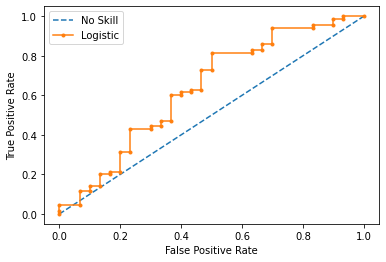

In [15]:
from sklearn.metrics import roc_curve

# retrieving just the probabilities for the positive class
pos_probs = y_preds[:, 1] 

# plotting no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# calculating roc curve for model
fpr, tpr, _ = roc_curve(y_valid, pos_probs)

# plotting model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')

# assigning axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score

# calculate roc auc
roc_auc = roc_auc_score(y_valid, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

Logistic ROC AUC 0.634


In [17]:
# !pip install scikit_optimize xgboost

In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = classifier.predict(X_valid)

In [20]:
roc_auc = roc_auc_score(y_valid, y_pred)

In [21]:
roc_auc

0.6000000000000001

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.40      0.43        30
           1       0.76      0.80      0.78        70

    accuracy                           0.68       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.67      0.68      0.67       100



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

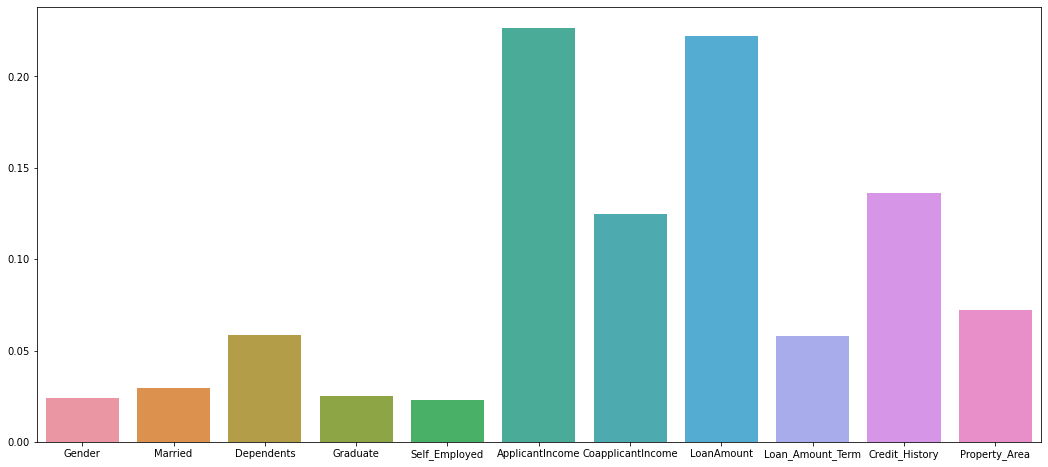

In [53]:
plt.figure(figsize = (18,8))
sns.barplot(X_train.columns, classifier.feature_importances_)

## Hyperparameter Tuning with XGBOOST

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from scipy.stats import randint, uniform
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

### Grid with Xgboost

In [39]:
%%time
param = {
    'learning_rate': [.1]
    , 'subsample': [.2, .3 ,.4, .5]
    , 'n_estimators': [25, 50]
    , 'min_child_weight': [25]
    , 'reg_alpha': [.3, .4, .5]
    , 'reg_lambda': [.1, .2, .3, .4, .5]
    , 'colsample_bytree': [.66]
    , 'max_depth': [5]
}
#iter - 4x2x3x5 = 120
model = XGBClassifier(random_state=42, n_jobs=-1) #input hyperparameters without tuning
gridsearch = GridSearchCV(model, param_grid=param, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
gridsearch.fit(X, y_labeled)
print('best score of Grid Search over 120 iterations:', gridsearch.best_score_)

best score of Grid Search over 120 iterations: 0.6959823801929065
CPU times: total: 906 ms
Wall time: 6.39 s


In [56]:
pred = gridsearch.best_estimator_.predict(X_valid)
roc_auc_score(y_valid, pred)

0.5

### Randomized with Xgboost

In [40]:
%%time
param = {
    'learning_rate': uniform(.05, .1) #actual value: (loc, loc + scale)
    , 'subsample': uniform(.2, .3)
    , 'n_estimators': randint(20, 70)
    , 'min_child_weight': randint(20, 40)
    , 'reg_alpha': uniform(0, .7)
    , 'reg_lambda': uniform(0, .7)
    , 'colsample_bytree': uniform(.1, .7)
    , 'max_depth': randint(2, 6)
}
randomsearch = RandomizedSearchCV(model, param_distributions=param, n_iter=120 # specify how many iterations
                                  , cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
randomsearch.fit(X, y_labeled)
print('best score of Randomized Search over 120 iterations:', randomsearch.best_score_)

best score of Randomized Search over 120 iterations: 0.6959823801929065
CPU times: total: 1.27 s
Wall time: 7.46 s


In [57]:
pred = randomsearch.best_estimator_.predict(X_valid)
roc_auc_score(y_valid, pred)

0.5

### Bayesian with Xgboost

In [42]:

%%time
param = {
    'learning_rate': Real(.05, .1+.05) #lower bound and upper bound
    , 'subsample': Real(.2, .5)
    , 'n_estimators': Integer(20, 70)
    , 'min_child_weight': Integer(20, 40)
    , 'reg_alpha': Real(0, 0+.7)
    , 'reg_lambda': Real(0, 0+.7)
    , 'colsample_bytree': Real(.1, .1+.7)
    , 'max_depth': Integer(2, 6)
}
bayessearch = BayesSearchCV(model, param, n_iter=60, # specify how many iterations
                                    scoring='accuracy', n_jobs=-1, cv=3)
bayessearch.fit(X, y_labeled)
print('best score of Bayes Search over 60 iterations:', bayessearch.best_score_)

best score of Bayes Search over 60 iterations: 0.6959823801929065
CPU times: total: 4min 29s
Wall time: 2min 45s


In [58]:
pred = bayessearch.best_estimator_.predict(X_valid)
roc_auc_score(y_valid, pred)

0.5

## Hyperparameter Tuning with Random Forest

### Grid with Random Forest

In [88]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [90]:
CV_rfc.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [93]:
preds = CV_rfc.best_estimator_.predict(X_valid)

In [94]:
roc_auc_score(y_valid, preds)

0.6142857142857143

### Randomized with ramdom Forest

In [65]:
param_grid = { 
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :randint(2, 7),
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)

CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,  n_iter=120 # specify how many iterations
                                  , cv=5, n_jobs=-1, scoring='accuracy')
CV_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=120, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E629F2EEB0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E62A350CD0>},
                   scoring='accuracy')

In [67]:
CV_rfc.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=106, random_state=42)

In [69]:
preds = CV_rfc.best_estimator_.predict(X_valid)

In [70]:
roc_auc_score(y_valid, preds)

0.6142857142857143

### Bayesian with Random Forest

In [81]:
%time
params = { 
    'n_estimators':Integer(100, 500),
    'max_features': ('auto', 'sqrt', 'log2'),
    'max_depth' : Integer(2,8),
    'criterion' :('gini', 'entropy')
}

rfc=RandomForestClassifier(random_state=42)

BSC_rfc = BayesSearchCV(rfc, params,  n_iter=120, scoring='accuracy', n_jobs=-1, cv=5)

BSC_rfc.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been eval

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=120, n_jobs=-1, scoring='accuracy',
              search_spaces={'criterion': ('gini', 'entropy'),
                             'max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'max_features': ('auto', 'sqrt', 'log2'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

In [84]:
BSC_rfc.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=288,
                       random_state=42)

In [86]:
preds = BSC_rfc.best_estimator_.predict(X_valid)

In [87]:
roc_auc_score(y_valid, preds)

0.6333333333333333

11490434/11490434 [==============================] - 2s 0us/step


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py:1290: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


-12.41118 0.003185823 17.104136


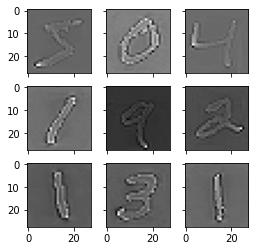

In [23]:
# ZCA Whitening
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train - X_mean, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break